Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [21]:
# Importing requried library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step No. 1 Data Selection

In [22]:
#importing dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [23]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [24]:
df.head()  #showing first five rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [25]:
df.tail()  #showing last five rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [26]:
df.shape #Dimension of dataset

(1000, 40)

There are 1000 rows and 40 columns present in dataset.

In [27]:
pd.set_option('display.max_rows',None)

pd.set_option('display.max_rows',None) - main purpose of using this is it will display all rows (if more than 10 rows) instead of first 5 and last 5.

In [28]:
df.info()  #information about dataset like data type, Null values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [29]:
df.dtypes   #datatype

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

policy_annual_premium, _c39 has float dataset; auto_year ,total_claim_amount, injury_claim, property_claim, vehicle_claim, witnesses, bodily_injuries, number_of_vehicles_involved, incident_hour_of_the_day,capital-loss,capital-gains, insured_zip, umbrella_limit,policy_deductable,months_as_customer, age, policy_number has integer value and rest dataset has object dataset.                                    

In [30]:
df.isnull().sum()  #to check for null value.

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 has null values only.

<AxesSubplot:>

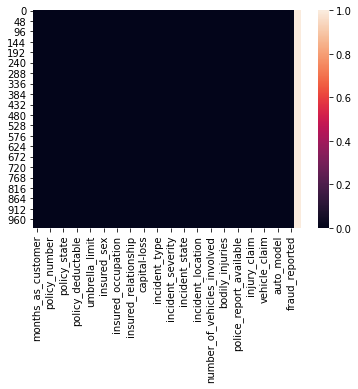

In [31]:
#Let's visualized null values.

sns.heatmap(df.isnull())

Above outcome helps to visualized null values.

# Step 2. Data Transformation

In [32]:
df = df.drop(columns=['_c39']) #removing unnecessary columns

In [33]:
df.isnull().sum()  #to check for null value.

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

No values present in dataset after removing unnecessary column

<AxesSubplot:>

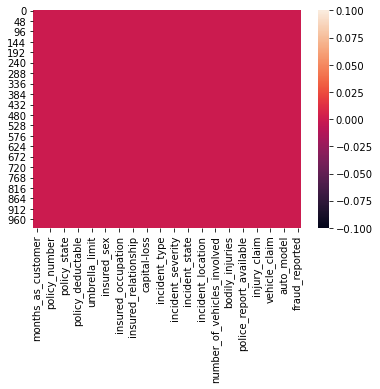

In [34]:
#Let's visualized null values.

sns.heatmap(df.isnull())

Above outcome visualized that no null values present in dataset.

In [35]:
from sklearn.preprocessing import LabelEncoder #importing required library.

In [36]:
lab_enc = LabelEncoder()  #storing LabelEncoder in lab_enc.
df1 = lab_enc.fit_transform(df['policy_state'])  #Storing type dataset into df1
df2 = lab_enc.fit_transform(df['policy_csl'])  #Storing type dataset into df2
df3 = lab_enc.fit_transform(df['insured_sex'])  #Storing type dataset into df3
df4 = lab_enc.fit_transform(df['insured_education_level'])  #Storing type dataset into df4
df5 = lab_enc.fit_transform(df['insured_occupation'])  #Storing type dataset into df5
df6 = lab_enc.fit_transform(df['insured_hobbies'])  #Storing type dataset into df6
df7 = lab_enc.fit_transform(df['insured_relationship'])  #Storing type dataset into df7
df8 = lab_enc.fit_transform(df['incident_type'])  #Storing type dataset into df8
df9 = lab_enc.fit_transform(df['collision_type'])  #Storing type dataset into df9
df10 = lab_enc.fit_transform(df['incident_severity'])  #Storing type dataset into df10
df11 = lab_enc.fit_transform(df['authorities_contacted'])  #Storing type dataset into df11
df12 = lab_enc.fit_transform(df['incident_state'])  #Storing type dataset into df12
df13 = lab_enc.fit_transform(df['incident_city'])  #Storing type dataset into df13
df14 = lab_enc.fit_transform(df['incident_location'])  #Storing type dataset into df14
df15 = lab_enc.fit_transform(df['property_damage'])  #Storing type dataset into df15
df16 = lab_enc.fit_transform(df['police_report_available'])  #Storing type dataset into df16
df17 = lab_enc.fit_transform(df['vehicle_claim'])  #Storing type dataset into df17
df18 = lab_enc.fit_transform(df['auto_make'])  #Storing type dataset into df18
df19 = lab_enc.fit_transform(df['auto_model'])  #Storing type dataset into df19
df20 = lab_enc.fit_transform(df['auto_year'])  #Storing type dataset into df20
df21 = lab_enc.fit_transform(df['fraud_reported'])  #Storing type dataset into df21

In [37]:
pd.Series(df1)  #Converting dataset

0      2
1      1
2      2
3      0
4      0
5      2
6      1
7      0
8      0
9      0
10     2
11     2
12     2
13     2
14     2
15     1
16     2
17     1
18     2
19     1
20     1
21     0
22     0
23     1
24     1
25     2
26     1
27     1
28     2
29     0
30     0
31     0
32     0
33     0
34     0
35     2
36     0
37     0
38     1
39     1
40     0
41     1
42     0
43     2
44     0
45     0
46     1
47     2
48     1
49     0
50     2
51     0
52     1
53     1
54     2
55     2
56     1
57     1
58     0
59     2
60     1
61     0
62     0
63     2
64     2
65     1
66     1
67     2
68     2
69     1
70     2
71     2
72     2
73     1
74     0
75     2
76     2
77     1
78     2
79     2
80     2
81     2
82     0
83     1
84     1
85     2
86     0
87     0
88     0
89     1
90     2
91     0
92     0
93     1
94     0
95     0
96     1
97     0
98     2
99     0
100    1
101    0
102    0
103    2
104    2
105    0
106    2
107    1
108    0
109    1
110    2
1

In [38]:
pd.Series(df2)  #Converting dataset

0      1
1      1
2      0
3      1
4      2
5      1
6      1
7      0
8      0
9      0
10     0
11     0
12     2
13     0
14     1
15     0
16     2
17     2
18     2
19     2
20     1
21     2
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     2
30     1
31     0
32     2
33     0
34     2
35     0
36     0
37     2
38     2
39     1
40     0
41     1
42     2
43     1
44     0
45     1
46     0
47     2
48     2
49     0
50     1
51     0
52     0
53     0
54     1
55     0
56     1
57     2
58     1
59     1
60     0
61     2
62     2
63     2
64     1
65     0
66     1
67     1
68     0
69     2
70     0
71     0
72     1
73     0
74     0
75     0
76     2
77     1
78     2
79     2
80     1
81     2
82     1
83     1
84     2
85     0
86     2
87     2
88     2
89     0
90     1
91     1
92     1
93     0
94     0
95     0
96     2
97     1
98     1
99     0
100    0
101    0
102    1
103    0
104    2
105    0
106    2
107    2
108    2
109    2
110    1
1

In [39]:
pd.Series(df3)  #Converting dataset

0      1
1      1
2      0
3      0
4      1
5      0
6      1
7      1
8      0
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
30     1
31     1
32     0
33     1
34     1
35     1
36     0
37     0
38     0
39     1
40     1
41     1
42     0
43     0
44     1
45     0
46     0
47     1
48     0
49     0
50     1
51     0
52     1
53     0
54     1
55     1
56     0
57     0
58     1
59     0
60     1
61     1
62     1
63     1
64     1
65     0
66     0
67     0
68     1
69     1
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     1
78     0
79     0
80     1
81     0
82     1
83     1
84     1
85     1
86     0
87     0
88     0
89     0
90     0
91     0
92     1
93     0
94     0
95     0
96     0
97     1
98     0
99     1
100    0
101    0
102    0
103    0
104    1
105    1
106    0
107    0
108    0
109    0
110    0
1

In [40]:
pd.Series(df4)  #Converting dataset

0      4
1      4
2      6
3      6
4      0
5      6
6      6
7      0
8      6
9      6
10     5
11     2
12     4
13     4
14     1
15     4
16     1
17     2
18     4
19     2
20     3
21     0
22     2
23     4
24     1
25     5
26     2
27     3
28     3
29     6
30     5
31     3
32     0
33     2
34     6
35     2
36     5
37     3
38     4
39     3
40     0
41     0
42     1
43     6
44     3
45     4
46     0
47     1
48     6
49     5
50     4
51     3
52     1
53     3
54     6
55     6
56     6
57     5
58     6
59     4
60     6
61     3
62     2
63     3
64     6
65     4
66     2
67     0
68     4
69     4
70     0
71     4
72     0
73     1
74     0
75     2
76     1
77     1
78     3
79     6
80     2
81     5
82     5
83     2
84     5
85     2
86     0
87     4
88     1
89     1
90     2
91     0
92     6
93     4
94     2
95     6
96     0
97     5
98     1
99     1
100    1
101    1
102    3
103    0
104    1
105    1
106    0
107    2
108    6
109    5
110    1
1

In [41]:
pd.Series(df5)  #Converting dataset

0       2
1       6
2      11
3       1
4      11
5      12
6       9
7      12
8       7
9       8
10      3
11      3
12     10
13      1
14      6
15     13
16      6
17      6
18      2
19      5
20      7
21      6
22      9
23      8
24      2
25     11
26      9
27      3
28     11
29      6
30      9
31      2
32      0
33      4
34      9
35      2
36     10
37      8
38      2
39     12
40     12
41     13
42      9
43     13
44      8
45     10
46      7
47      7
48     10
49      3
50      7
51      4
52      1
53      8
54      6
55      2
56      9
57      0
58      7
59      0
60      6
61      5
62      1
63     13
64     11
65      3
66     12
67      0
68      6
69      7
70      9
71      1
72     11
73     13
74     11
75     13
76      5
77     13
78      7
79      5
80      3
81      3
82      7
83      3
84      9
85     13
86      8
87      7
88      9
89      3
90     11
91     12
92      4
93      3
94      6
95      1
96     10
97      4
98      6
99      3


In [42]:
pd.Series(df6)  #Converting dataset

0      17
1      15
2       2
3       2
4       2
5       3
6       2
7       0
8       9
9       4
10      7
11     16
12     15
13      3
14      2
15     12
16     10
17     15
18     19
19      4
20      3
21     16
22     13
23      5
24     11
25     14
26      9
27      5
28     11
29      1
30     18
31     15
32     19
33     18
34     19
35     15
36      4
37      9
38      3
39     18
40     11
41      5
42     10
43     15
44     15
45     19
46     14
47     11
48      7
49     12
50      3
51     14
52      1
53     12
54     12
55     16
56      5
57     10
58     19
59     11
60      0
61      1
62      3
63     18
64      5
65      5
66     13
67     15
68     12
69     11
70     17
71      6
72     13
73      9
74     19
75      3
76      9
77      7
78     11
79     14
80     13
81     18
82      3
83     18
84     12
85      2
86     19
87     19
88     11
89      8
90      2
91      8
92     19
93      8
94     10
95      8
96     10
97     16
98     11
99     15


In [43]:
pd.Series(df7)  #Converting dataset

0      0
1      2
2      3
3      4
4      4
5      4
6      0
7      4
8      3
9      5
10     2
11     2
12     5
13     5
14     1
15     2
16     3
17     4
18     2
19     3
20     3
21     3
22     2
23     3
24     0
25     3
26     3
27     1
28     1
29     4
30     0
31     0
32     2
33     5
34     3
35     1
36     4
37     4
38     4
39     5
40     1
41     4
42     0
43     3
44     4
45     0
46     0
47     0
48     2
49     5
50     3
51     0
52     1
53     0
54     1
55     1
56     4
57     3
58     0
59     3
60     2
61     0
62     4
63     3
64     1
65     2
66     1
67     4
68     3
69     3
70     3
71     1
72     0
73     1
74     5
75     2
76     0
77     1
78     5
79     4
80     0
81     5
82     2
83     5
84     1
85     3
86     0
87     3
88     1
89     1
90     3
91     3
92     3
93     1
94     1
95     0
96     1
97     3
98     5
99     1
100    1
101    4
102    0
103    2
104    5
105    0
106    0
107    3
108    2
109    0
110    4
1

In [44]:
pd.Series(df8)  #Converting dataset

0      2
1      3
2      0
3      2
4      3
5      0
6      0
7      0
8      2
9      2
10     2
11     0
12     2
13     1
14     2
15     0
16     0
17     2
18     2
19     0
20     0
21     0
22     0
23     2
24     2
25     0
26     1
27     3
28     2
29     2
30     0
31     0
32     0
33     0
34     2
35     2
36     2
37     1
38     0
39     2
40     2
41     2
42     0
43     2
44     2
45     0
46     0
47     0
48     3
49     2
50     0
51     3
52     3
53     0
54     1
55     2
56     0
57     1
58     2
59     0
60     0
61     0
62     2
63     0
64     0
65     0
66     2
67     0
68     2
69     1
70     0
71     2
72     2
73     0
74     0
75     0
76     0
77     0
78     3
79     2
80     0
81     3
82     3
83     3
84     0
85     0
86     0
87     2
88     1
89     0
90     0
91     2
92     1
93     0
94     0
95     3
96     2
97     0
98     1
99     3
100    2
101    2
102    0
103    1
104    0
105    3
106    0
107    0
108    2
109    0
110    2
1

In [45]:
pd.Series(df9)  #Converting dataset

0      3
1      0
2      2
3      1
4      0
5      2
6      1
7      1
8      1
9      2
10     1
11     1
12     2
13     0
14     2
15     3
16     2
17     3
18     3
19     3
20     2
21     3
22     2
23     1
24     2
25     2
26     0
27     0
28     3
29     2
30     3
31     3
32     1
33     1
34     3
35     1
36     2
37     0
38     2
39     1
40     2
41     3
42     3
43     2
44     1
45     2
46     2
47     1
48     0
49     2
50     1
51     0
52     0
53     3
54     0
55     2
56     1
57     0
58     1
59     3
60     2
61     3
62     3
63     1
64     2
65     1
66     3
67     3
68     1
69     0
70     3
71     1
72     2
73     2
74     3
75     1
76     1
77     1
78     0
79     2
80     3
81     0
82     0
83     0
84     3
85     1
86     1
87     3
88     0
89     3
90     1
91     3
92     0
93     1
94     2
95     0
96     3
97     2
98     0
99     0
100    2
101    3
102    1
103    0
104    3
105    0
106    2
107    1
108    1
109    2
110    2
1

In [46]:
pd.Series(df10)  #Converting dataset

0      0
1      1
2      1
3      0
4      1
5      0
6      1
7      2
8      2
9      2
10     2
11     0
12     2
13     1
14     2
15     0
16     0
17     2
18     2
19     0
20     1
21     2
22     0
23     2
24     1
25     0
26     1
27     1
28     1
29     1
30     0
31     0
32     2
33     0
34     2
35     0
36     2
37     1
38     0
39     0
40     1
41     0
42     1
43     2
44     1
45     2
46     2
47     0
48     3
49     2
50     1
51     3
52     1
53     0
54     1
55     1
56     0
57     1
58     2
59     1
60     0
61     2
62     1
63     0
64     2
65     1
66     1
67     1
68     0
69     1
70     0
71     2
72     1
73     1
74     1
75     2
76     1
77     2
78     1
79     0
80     1
81     3
82     1
83     3
84     0
85     0
86     1
87     2
88     3
89     0
90     2
91     0
92     3
93     0
94     2
95     1
96     0
97     1
98     3
99     3
100    1
101    0
102    1
103    1
104    2
105    1
106    0
107    0
108    0
109    0
110    1
1

In [47]:
pd.Series(df11)  #Converting dataset

0      4
1      4
2      4
3      4
4      2
5      1
6      4
7      4
8      4
9      3
10     4
11     1
12     0
13     2
14     4
15     3
16     3
17     4
18     3
19     4
20     4
21     4
22     0
23     0
24     3
25     3
26     4
27     2
28     3
29     4
30     0
31     4
32     4
33     0
34     1
35     3
36     4
37     2
38     4
39     0
40     0
41     4
42     3
43     3
44     3
45     3
46     1
47     1
48     4
49     3
50     1
51     2
52     2
53     4
54     4
55     1
56     1
57     2
58     0
59     4
60     4
61     3
62     3
63     1
64     1
65     0
66     1
67     1
68     0
69     2
70     3
71     3
72     0
73     1
74     0
75     0
76     1
77     4
78     2
79     1
80     0
81     2
82     4
83     2
84     0
85     1
86     3
87     1
88     2
89     3
90     1
91     4
92     2
93     0
94     0
95     2
96     1
97     3
98     2
99     2
100    4
101    4
102    1
103    4
104    4
105    2
106    4
107    0
108    1
109    1
110    4
1

In [48]:
pd.Series(df12)  #Converting dataset

0      4
1      5
2      1
3      2
4      1
5      4
6      1
7      5
8      6
9      0
10     1
11     4
12     4
13     4
14     4
15     6
16     1
17     6
18     1
19     5
20     1
21     4
22     4
23     6
24     5
25     2
26     3
27     5
28     4
29     4
30     4
31     6
32     1
33     1
34     6
35     6
36     1
37     6
38     1
39     0
40     6
41     6
42     4
43     0
44     4
45     1
46     0
47     6
48     1
49     6
50     1
51     1
52     6
53     0
54     5
55     1
56     4
57     5
58     6
59     5
60     1
61     2
62     6
63     6
64     5
65     1
66     4
67     6
68     6
69     0
70     4
71     6
72     0
73     4
74     5
75     4
76     1
77     6
78     4
79     4
80     0
81     0
82     1
83     5
84     1
85     1
86     4
87     5
88     6
89     4
90     4
91     1
92     6
93     0
94     4
95     2
96     5
97     4
98     6
99     0
100    4
101    6
102    0
103    6
104    4
105    6
106    5
107    6
108    1
109    1
110    4
1

In [49]:
pd.Series(df13)  #Converting dataset

0      1
1      5
2      1
3      0
4      0
5      0
6      6
7      1
8      0
9      2
10     3
11     6
12     3
13     6
14     6
15     2
16     5
17     3
18     4
19     1
20     1
21     0
22     2
23     3
24     5
25     0
26     0
27     4
28     3
29     4
30     1
31     5
32     0
33     2
34     2
35     6
36     4
37     0
38     2
39     1
40     1
41     4
42     6
43     0
44     6
45     0
46     3
47     0
48     0
49     6
50     5
51     0
52     3
53     1
54     3
55     0
56     1
57     5
58     5
59     2
60     6
61     6
62     2
63     3
64     5
65     0
66     6
67     2
68     4
69     5
70     2
71     4
72     0
73     5
74     6
75     5
76     6
77     4
78     6
79     4
80     0
81     4
82     4
83     2
84     2
85     4
86     1
87     6
88     0
89     1
90     0
91     1
92     6
93     5
94     3
95     4
96     6
97     2
98     1
99     4
100    3
101    3
102    4
103    3
104    3
105    1
106    3
107    1
108    4
109    6
110    5
1

In [50]:
pd.Series(df14)  #Converting dataset

0      996
1      628
2      685
3      669
4      220
5      891
6      539
7      276
8      429
9      224
10      61
11     553
12     633
13     622
14     658
15     953
16     459
17     393
18     319
19     803
20     486
21     889
22     164
23     518
24     162
25     262
26     165
27     307
28     244
29     123
30     412
31     900
32     565
33     823
34     277
35     233
36     445
37     637
38     332
39     264
40     427
41     520
42     245
43     635
44      78
45     360
46     720
47     879
48     630
49     557
50     461
51     139
52     172
53     719
54     536
55     646
56     428
57     488
58     370
59     143
60     629
61     717
62     281
63     157
64      22
65      16
66     918
67     838
68     530
69     758
70     791
71     653
72     148
73     784
74     419
75     454
76     120
77     191
78     780
79     617
80     225
81     681
82     462
83     149
84       0
85     721
86     948
87     122
88     503
89     698
90     827

In [51]:
pd.Series(df15)  #Converting dataset

0      2
1      0
2      1
3      0
4      1
5      1
6      0
7      0
8      1
9      1
10     2
11     2
12     2
13     1
14     1
15     2
16     0
17     1
18     2
19     0
20     1
21     0
22     1
23     0
24     1
25     1
26     2
27     2
28     1
29     1
30     1
31     1
32     2
33     1
34     2
35     2
36     0
37     1
38     0
39     0
40     1
41     0
42     2
43     1
44     2
45     1
46     2
47     1
48     0
49     1
50     0
51     0
52     0
53     2
54     1
55     2
56     0
57     1
58     2
59     1
60     2
61     1
62     1
63     2
64     1
65     2
66     2
67     1
68     1
69     1
70     0
71     1
72     1
73     1
74     2
75     1
76     1
77     1
78     2
79     0
80     1
81     0
82     2
83     1
84     0
85     2
86     1
87     0
88     1
89     2
90     2
91     1
92     1
93     1
94     1
95     1
96     2
97     2
98     0
99     1
100    2
101    2
102    0
103    1
104    1
105    2
106    0
107    1
108    0
109    1
110    0
1

In [52]:
pd.Series(df16)  #Converting dataset

0      2
1      0
2      1
3      1
4      1
5      1
6      0
7      2
8      2
9      0
10     0
11     2
12     1
13     1
14     2
15     1
16     2
17     2
18     1
19     1
20     0
21     0
22     2
23     0
24     1
25     2
26     2
27     0
28     2
29     1
30     0
31     0
32     1
33     0
34     2
35     2
36     2
37     2
38     0
39     1
40     0
41     0
42     1
43     1
44     0
45     0
46     0
47     1
48     2
49     0
50     2
51     0
52     2
53     0
54     2
55     1
56     0
57     1
58     1
59     1
60     0
61     1
62     2
63     2
64     1
65     1
66     1
67     1
68     1
69     0
70     0
71     1
72     1
73     2
74     2
75     1
76     2
77     0
78     2
79     0
80     1
81     0
82     1
83     2
84     1
85     0
86     0
87     2
88     2
89     0
90     0
91     0
92     1
93     0
94     1
95     2
96     1
97     2
98     2
99     0
100    0
101    2
102    1
103    1
104    0
105    2
106    2
107    0
108    0
109    2
110    2
1

In [53]:
pd.Series(df17)  #Converting dataset

0      545
1       38
2      116
3      521
4       66
5      531
6      512
7      197
8      113
9      198
10     681
11     725
12     356
13      78
14     205
15     351
16     323
17     612
18     561
19     478
20     348
21     199
22     463
23     717
24     612
25     392
26     100
27      55
28     440
29     683
30     516
31     548
32     117
33     490
34     485
35     263
36     474
37      31
38     382
39     281
40     145
41     689
42     317
43     308
44     208
45     475
46     679
47     514
48      90
49     569
50     620
51      83
52      36
53     411
54       2
55     595
56     513
57       5
58     529
59     423
60     577
61     201
62     301
63     532
64     427
65     670
66     674
67     162
68     507
69      18
70     504
71     462
72     140
73     365
74     149
75     212
76     698
77     277
78      89
79     518
80     165
81      68
82      82
83      54
84     399
85     331
86     421
87     332
88      32
89     302
90     436

In [54]:
pd.Series(df18)  #Converting dataset

0      10
1       8
2       4
3       3
4       0
5      10
6       9
7       1
8      12
9      10
10      5
11      1
12     10
13     12
14      4
15      0
16      9
17     11
18      0
19      9
20     11
21      0
22     11
23      4
24      5
25      5
26     12
27     11
28      4
29      0
30     12
31      5
32      2
33     11
34      1
35      8
36     11
37     11
38      7
39      9
40      2
41      2
42      4
43      8
44     12
45      0
46      6
47      1
48     13
49      8
50      9
51      2
52     12
53     11
54      5
55      3
56      6
57      3
58     10
59      5
60      9
61      6
62      2
63     11
64      5
65      4
66      1
67      2
68      1
69      5
70      1
71      6
72      3
73      8
74      2
75      5
76     11
77      1
78     10
79      2
80      0
81      0
82      9
83     13
84      1
85     11
86      5
87      2
88      4
89      0
90     10
91      6
92      2
93      5
94      8
95     12
96      4
97      9
98     10
99      1


In [55]:
pd.Series(df19)  #Converting dataset

0       1
1      12
2      30
3      34
4      31
5       3
6      29
7       5
8       9
9       1
10     14
11      4
12      3
13     18
14     27
15     23
16     26
17     21
18     33
19     29
20     19
21     31
22     15
23     30
24     13
25     13
26      9
27     15
28     27
29     33
30     11
31     14
32      0
33     19
34      4
35      7
36     15
37     21
38     36
39     29
40     22
41     37
42     30
43     12
44     18
45     23
46     10
47      4
48     28
49      7
50     29
51     22
52     11
53     15
54     14
55     32
56      8
57     32
58      2
59     13
60     26
61      6
62     22
63     21
64     13
65     27
66      5
67     38
68      5
69     14
70      4
71     10
72     25
73      7
74     38
75     16
76     21
77      4
78      3
79     22
80     23
81     33
82     26
83     20
84      4
85     21
86     14
87      0
88     27
89     23
90      2
91      6
92     37
93     16
94     24
95     18
96     30
97     29
98      3
99      4


In [56]:
pd.Series(df20)  #Converting dataset

0       9
1      12
2      12
3      19
4      14
5       8
6      17
7      20
8      17
9       1
10      7
11     11
12      5
13     15
14      8
15      4
16     17
17     20
18     20
19     19
20     16
21      1
22      5
23     16
24     10
25     11
26     10
27      8
28     14
29     16
30     10
31     11
32     13
33     20
34      4
35      0
36      9
37      6
38     12
39     16
40     15
41      6
42     15
43     10
44     19
45      7
46     19
47      8
48      0
49      5
50      3
51     13
52      5
53      4
54     14
55      0
56     19
57     19
58     12
59      5
60     19
61      2
62     16
63      8
64     11
65      0
66     14
67      3
68      2
69      9
70      8
71      0
72      4
73      7
74     10
75     15
76      3
77     10
78      9
79     18
80     10
81     10
82      7
83      7
84     18
85     12
86     12
87     20
88      7
89     16
90      0
91      9
92     12
93     14
94     10
95      6
96     11
97     18
98      4
99     12


In [57]:
pd.Series(df21)  #Converting dataset

0      1
1      1
2      0
3      1
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     1
36     1
37     0
38     0
39     1
40     0
41     1
42     0
43     0
44     0
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     1
61     0
62     0
63     1
64     1
65     1
66     1
67     0
68     0
69     0
70     1
71     1
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     0
89     1
90     0
91     1
92     0
93     0
94     0
95     0
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    1
109    1
110    0
1

In [58]:
df['policy_state']=df1  #storing dataset in df2
df['policy_csl']=df2
df['insured_sex']=df3
df['insured_education_level']=df4
df['insured_occupation']=df5
df['insured_hobbies']=df6
df['insured_relationship']=df7
df['incident_type']=df8  #storing dataset in df2
df['collision_type']=df9
df['incident_severity']=df10
df['authorities_contacted']=df11
df['incident_state']=df12
df['incident_city']=df13
df['incident_location']=df14
df['property_damage']=df15  #storing dataset in df2
df['police_report_available']=df16
df['vehicle_claim']=df17
df['auto_make']=df18
df['auto_model']=df19
df['auto_year']=df20
df['fraud_reported']=df21

In [59]:
df.head() #showing first five rows after data transformation.

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,545,10,1,9,1
1,228,42,342868,27-06-2006,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,38,8,12,12,1
2,134,29,687698,06-09-2000,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,116,4,30,12,0
3,256,41,227811,25-05-1990,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,521,3,34,19,1
4,228,44,367455,06-06-2014,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,66,0,31,14,0


In [60]:
df['fraud_reported'].value_counts() ##gives count

0    753
1    247
Name: fraud_reported, dtype: int64

In above outcome, There are total 247 - 1's(Y) and 753 - 0's (N).

In [61]:
data = df['fraud_reported'].value_counts()  #storing values in data 

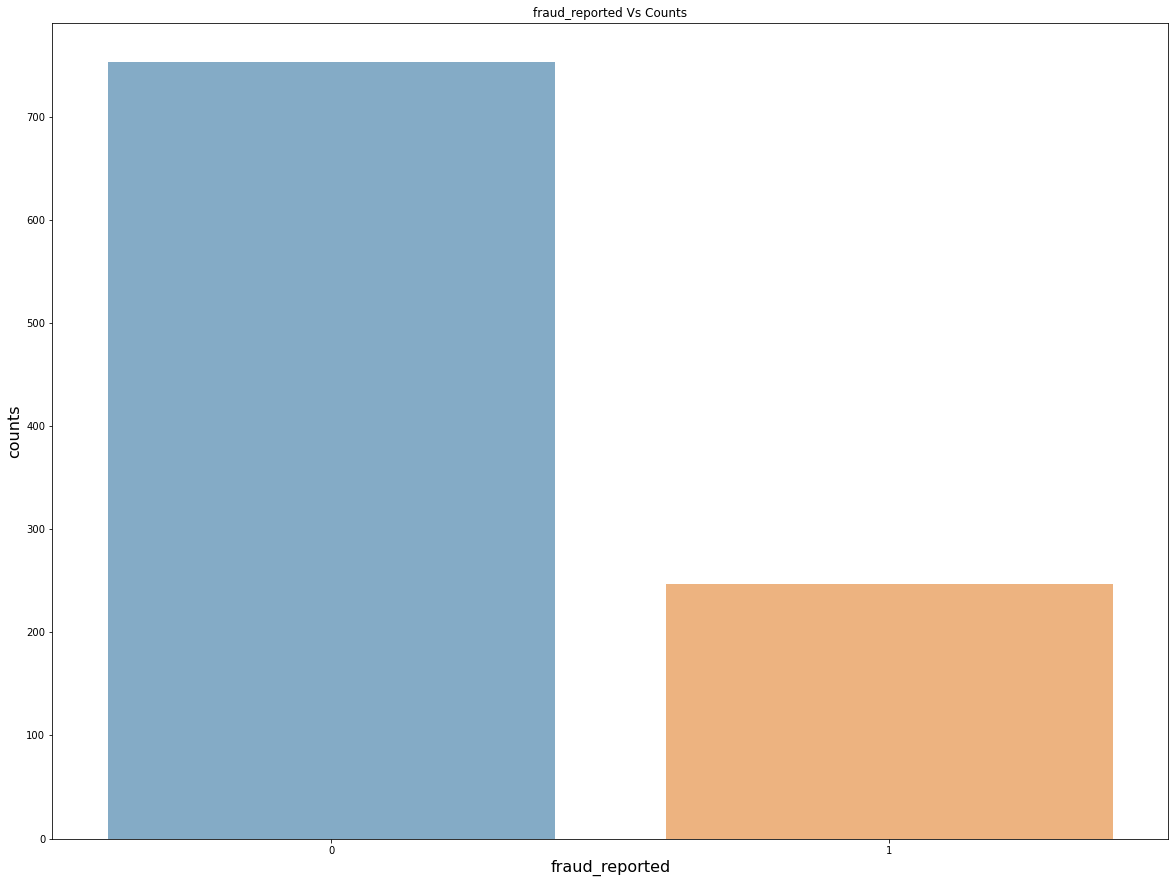

In [62]:
#Let's visualized it thorugh bargraph.

plt.figure(figsize=(20,15))
sns.barplot(data.index,data.values,alpha=0.6)
plt.xlabel('fraud_reported', fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('fraud_reported Vs Counts')
plt.show()

BarGraph help to understand it better.

# Step No 3. Data description


In [63]:
df.describe()  #statstical summary

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,347.164000,6.546000,19.318000,10.103000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,209.404851,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,163.750000,3.000000,10.000000,5.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,351.500000,7.000000,20.000000,10.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,523.250000,10.000000,29.000000,15.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,725.000000,13.000000,38.000000,20.000000,1.000000


Describe method gives stastical details like count, mean, std, min, max, 25%, 50%, 75%.
Above outcome shows, There are outiler present in dataset by comparing mean and 50% value. There is major difference between them like in months_as_customer, policy_number,policy_deductable etc.

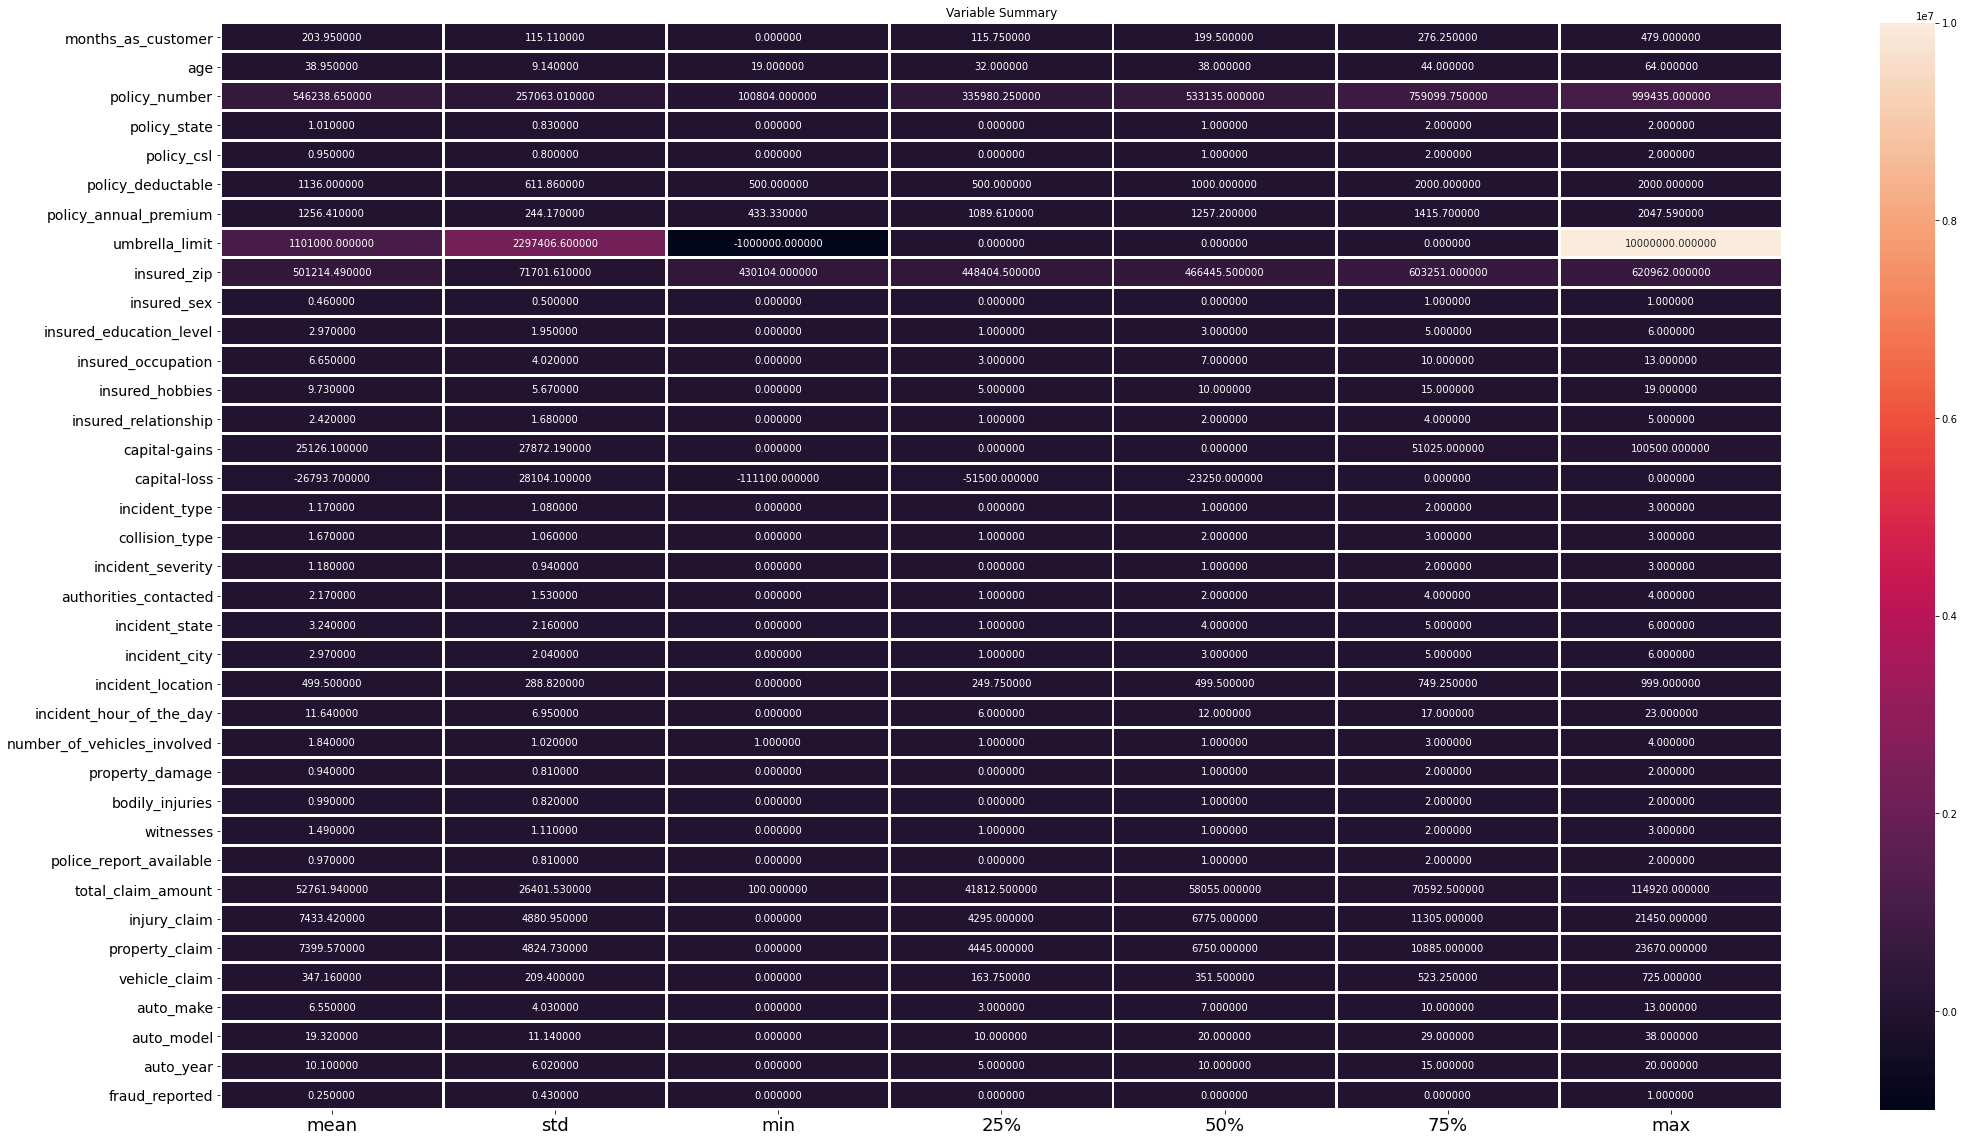

In [64]:
#lets visulized dataset

plt.figure(figsize=(35,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable Summary")
plt.show()

Above outcome helps to understand relation between various varibales better.

In [65]:
corr_mat = df.corr() # Checking for correlation

In [66]:
corr_mat

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.057227,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.059784,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.015098,0.023860,0.065240,-0.000183,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,-0.007492,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.027320,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.010345,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.017204,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.032483,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.033511,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.031984,0.026457,-0.018421,-0.028247,0.030873


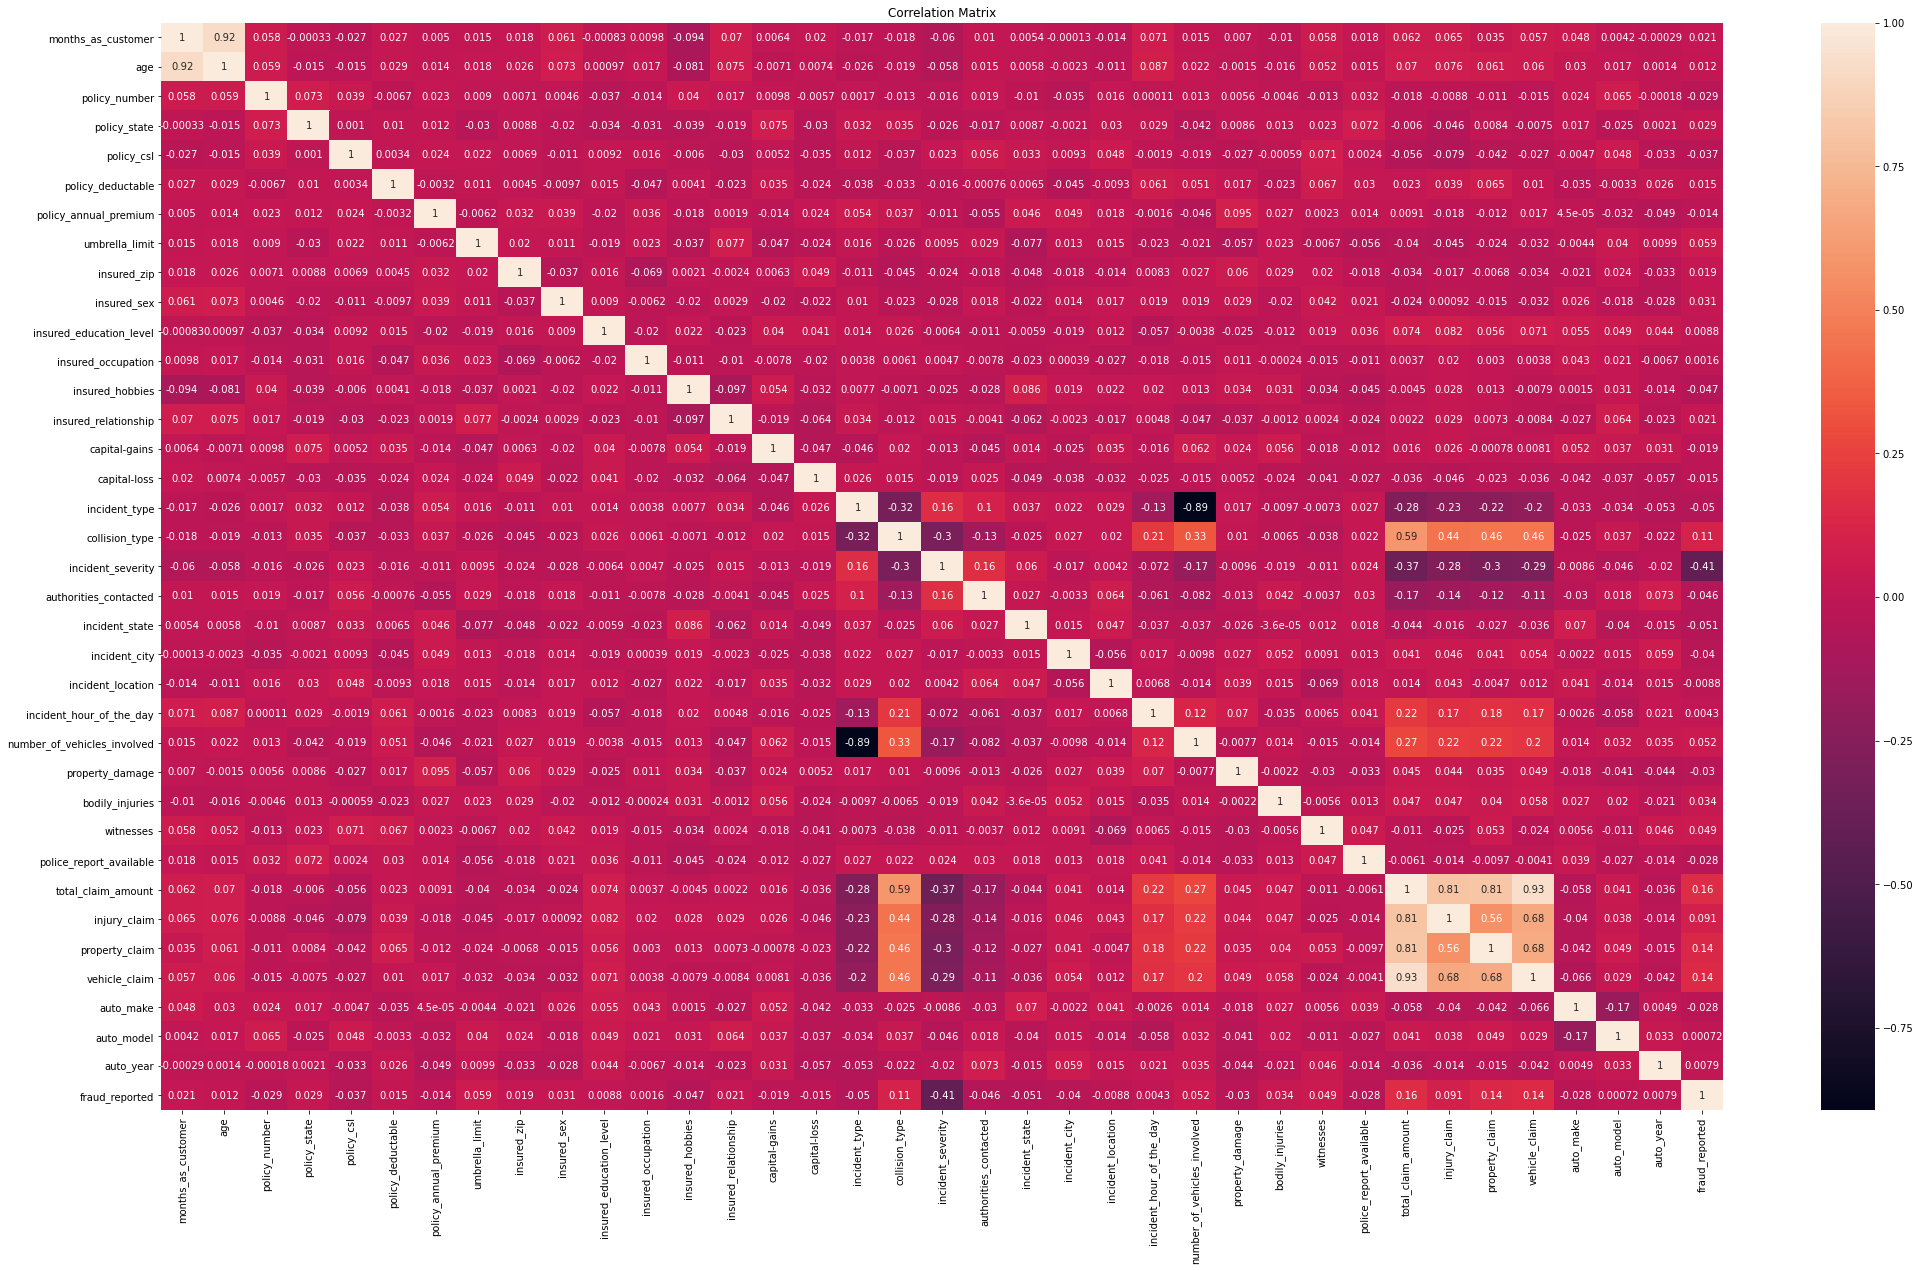

In [67]:
# visulization of correlated values.

plt.figure(figsize=(35,20))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

All columns of database are positively correlated.
It shows coorelation between various columns and target column.

# Step 4. Data standarization and normalization

months_as_customer                AxesSubplot(0.125,0.799681;0.110714x0.0803191)
age                            AxesSubplot(0.257857,0.799681;0.110714x0.0803191)
policy_number                  AxesSubplot(0.390714,0.799681;0.110714x0.0803191)
policy_state                   AxesSubplot(0.523571,0.799681;0.110714x0.0803191)
policy_csl                     AxesSubplot(0.656429,0.799681;0.110714x0.0803191)
policy_deductable              AxesSubplot(0.789286,0.799681;0.110714x0.0803191)
policy_annual_premium             AxesSubplot(0.125,0.703298;0.110714x0.0803191)
umbrella_limit                 AxesSubplot(0.257857,0.703298;0.110714x0.0803191)
insured_zip                    AxesSubplot(0.390714,0.703298;0.110714x0.0803191)
insured_sex                    AxesSubplot(0.523571,0.703298;0.110714x0.0803191)
insured_education_level        AxesSubplot(0.656429,0.703298;0.110714x0.0803191)
insured_occupation             AxesSubplot(0.789286,0.703298;0.110714x0.0803191)
insured_hobbies             

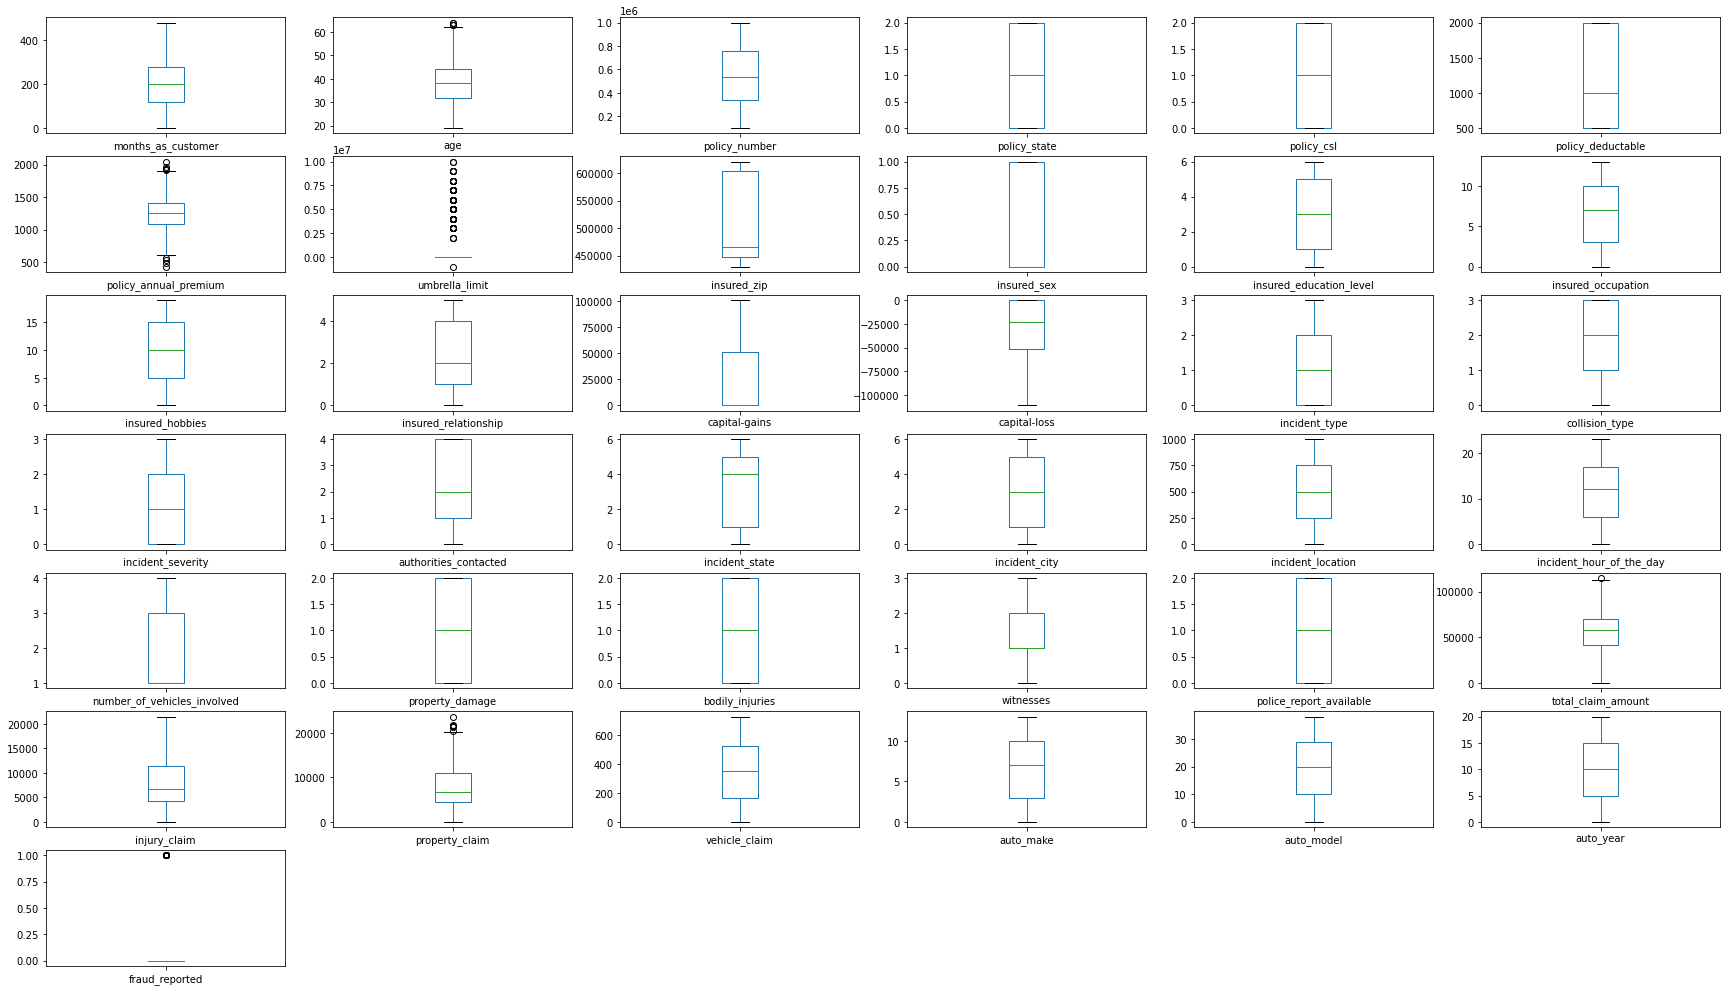

In [68]:
df.plot(kind='box',subplots =True, layout=(8,6),figsize=(30,20))

Above both outcome show outlier present in columns.

In [70]:
df.skew() #to check skewness

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


#Normalized data range has skewnees ranges between +0.5 to -0.5.

Columns has skewness - umbrella_limit, number_of_vehicles_involved , total_claim_amount, fraud_reported etc

Let's visualized skewness with help of distplot.

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

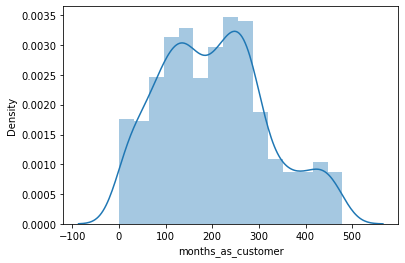

In [107]:
sns.distplot(df['months_as_customer'])

<AxesSubplot:xlabel='age', ylabel='Density'>

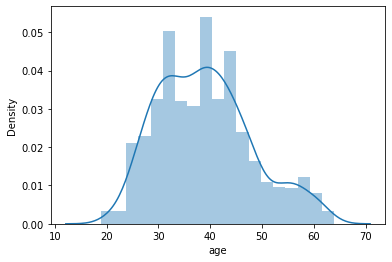

In [106]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

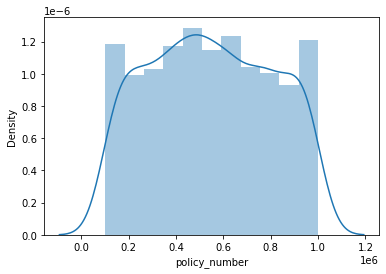

In [105]:
sns.distplot(df['policy_number'])

<AxesSubplot:xlabel='policy_state', ylabel='Density'>

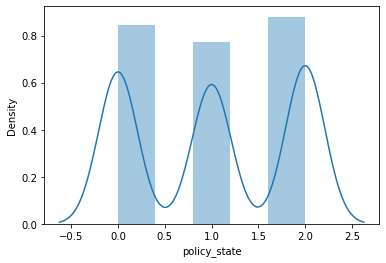

In [104]:
sns.distplot(df['policy_state'])

<AxesSubplot:xlabel='policy_csl', ylabel='Density'>

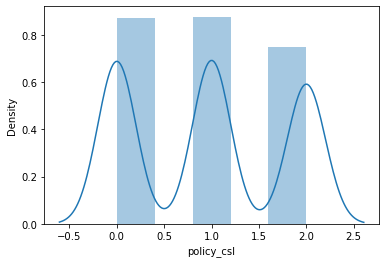

In [103]:
sns.distplot(df['policy_csl'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

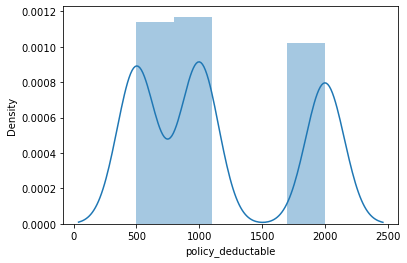

In [102]:
sns.distplot(df['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

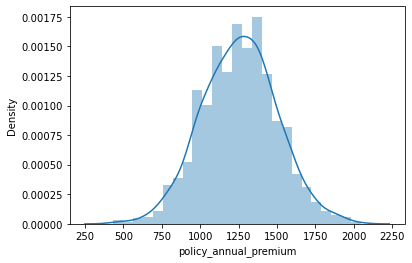

In [101]:
sns.distplot(df['policy_annual_premium'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

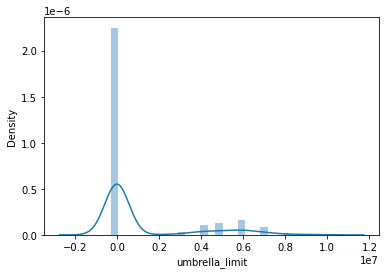

In [100]:
sns.distplot(df['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

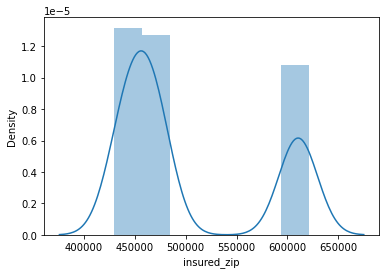

In [99]:
sns.distplot(df['insured_zip'])

<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

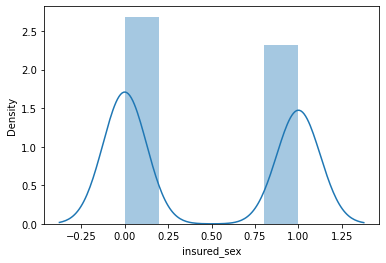

In [98]:
sns.distplot(df['insured_sex'])

<AxesSubplot:xlabel='insured_education_level', ylabel='Density'>

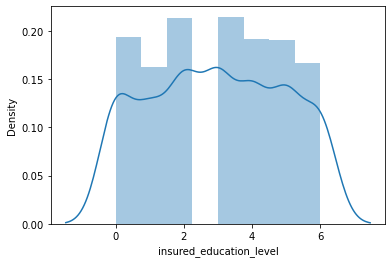

In [97]:
sns.distplot(df['insured_education_level'])

<AxesSubplot:xlabel='insured_occupation', ylabel='Density'>

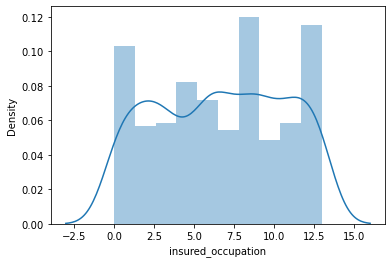

In [96]:
sns.distplot(df['insured_occupation'])

<AxesSubplot:xlabel='insured_hobbies', ylabel='Density'>

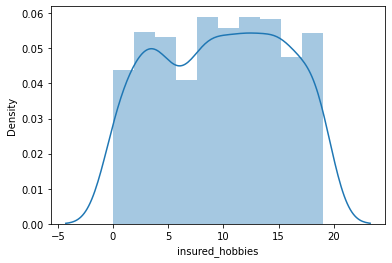

In [95]:
sns.distplot(df['insured_hobbies'])

<AxesSubplot:xlabel='insured_relationship', ylabel='Density'>

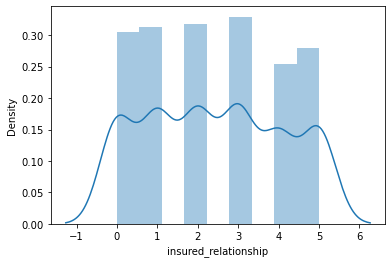

In [94]:
sns.distplot(df['insured_relationship'])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

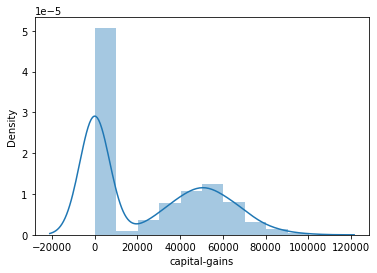

In [93]:
sns.distplot(df['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

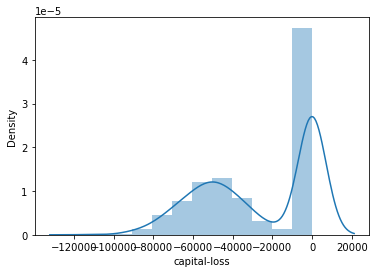

In [92]:
sns.distplot(df['capital-loss'])

<AxesSubplot:xlabel='incident_type', ylabel='Density'>

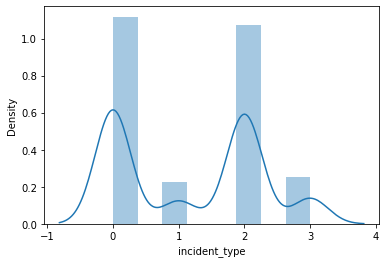

In [91]:
sns.distplot(df['incident_type'])

<AxesSubplot:xlabel='collision_type', ylabel='Density'>

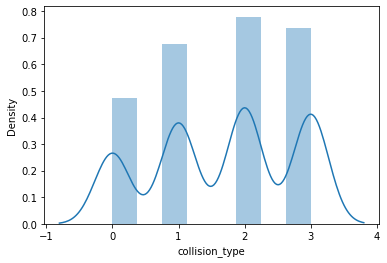

In [90]:
sns.distplot(df['collision_type'])

<AxesSubplot:xlabel='incident_severity', ylabel='Density'>

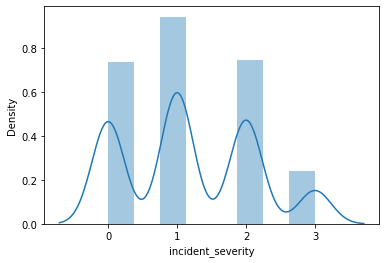

In [89]:
sns.distplot(df['incident_severity'])

<AxesSubplot:xlabel='authorities_contacted', ylabel='Density'>

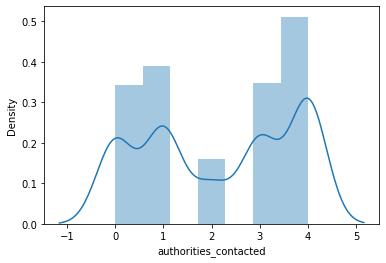

In [88]:
sns.distplot(df['authorities_contacted'])

<AxesSubplot:xlabel='incident_state', ylabel='Density'>

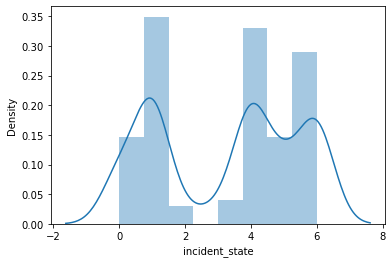

In [87]:
sns.distplot(df['incident_state'])

<AxesSubplot:xlabel='incident_city', ylabel='Density'>

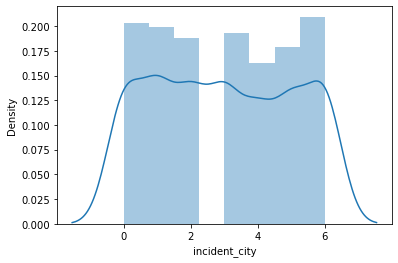

In [86]:
sns.distplot(df['incident_city'])

<AxesSubplot:xlabel='incident_location', ylabel='Density'>

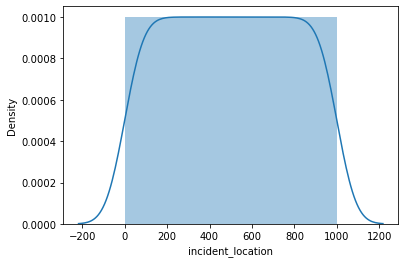

In [85]:
sns.distplot(df['incident_location'])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

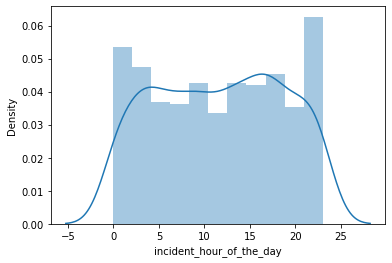

In [84]:
sns.distplot(df['incident_hour_of_the_day'])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

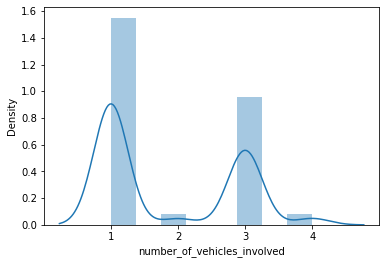

In [83]:
sns.distplot(df['number_of_vehicles_involved'])

<AxesSubplot:xlabel='property_damage', ylabel='Density'>

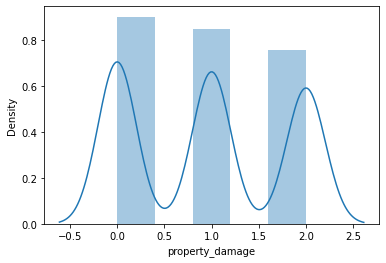

In [82]:
sns.distplot(df['property_damage'])

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

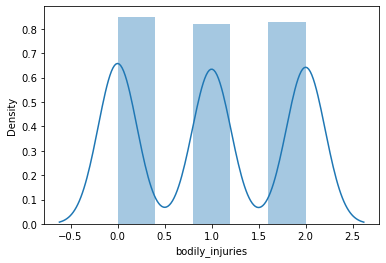

In [81]:
sns.distplot(df['bodily_injuries'])

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

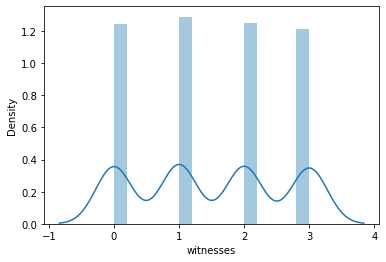

In [80]:
sns.distplot(df['witnesses'])

<AxesSubplot:xlabel='police_report_available', ylabel='Density'>

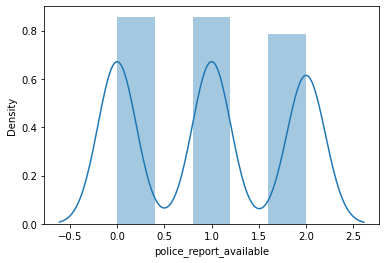

In [79]:
sns.distplot(df['police_report_available'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

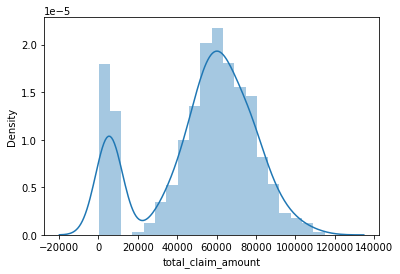

In [78]:
sns.distplot(df['total_claim_amount'])

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

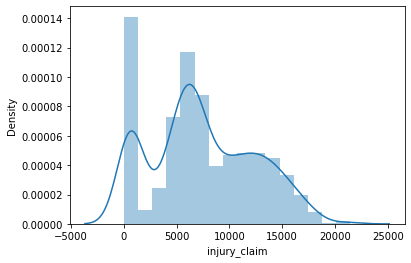

In [77]:
sns.distplot(df['injury_claim'])

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

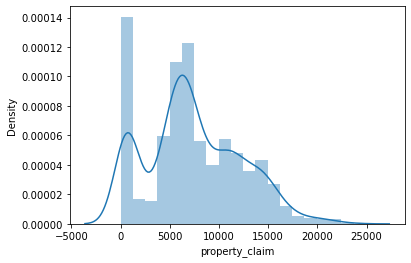

In [76]:
sns.distplot(df['property_claim'])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

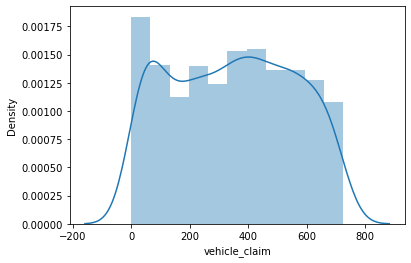

In [75]:
sns.distplot(df['vehicle_claim'])

<AxesSubplot:xlabel='auto_make', ylabel='Density'>

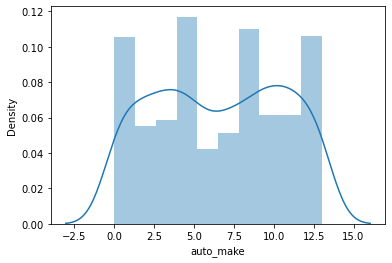

In [74]:
sns.distplot(df['auto_make'])

<AxesSubplot:xlabel='auto_model', ylabel='Density'>

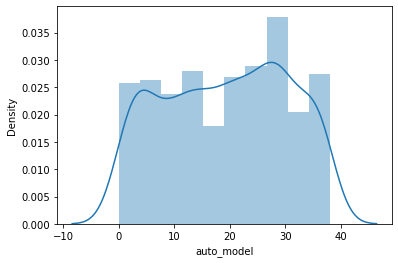

In [73]:
sns.distplot(df['auto_model'])

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

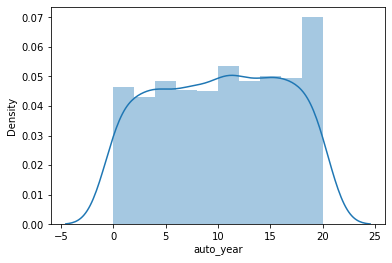

In [72]:
sns.distplot(df['auto_year'])

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

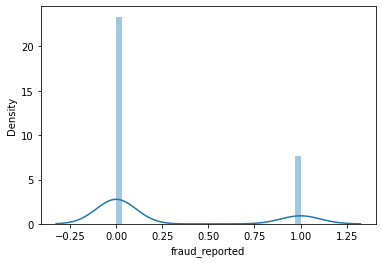

In [71]:
sns.distplot(df['fraud_reported'])

Removing skewness from dataset with help of zscore.

In [109]:
df = df.drop(columns=['policy_bind_date']) #removing unnecessary columns

In [110]:
df = df.drop(columns=['incident_date']) #removing unnecessary columns

In [111]:
from scipy.stats import zscore 
from scipy import stats    #Importing requried library.
z = np.abs(stats.zscore(df))
z.shape

(1000, 37)

In [112]:
index = (np.where(z>5)[0])
df = df.drop(df.index[index])
df.shape

(1000, 37)

In [113]:
loss_percent=(1000-1000)/1000*100
print(loss_percent) 

0.0


After removing skewness - total data lost is 0.00%.

# Step 5. Creation of train and test data sets using optimum parameters

In [114]:
#splitting dataset into x and y.

y = df['fraud_reported']
x = df.drop(columns=['fraud_reported'])

In [115]:
x.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,1,2,2,71610,6510,13020,545,10,1,9
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,0,5070,780,780,38,8,12,12
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,2,3,1,34650,7700,3850,116,4,30,12
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,1,2,1,63400,6340,6340,521,3,34,19
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,0,1,1,6500,1300,650,66,0,31,14


In [116]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [117]:
# Data Scaling
#StandardScaler = (X-mean)/std
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled 

array([[ 1.07813958,  0.99083647, -0.09595307, ...,  0.85646614,
        -1.64574255, -0.1834404 ],
       [ 0.2089946 ,  0.33407345, -0.79152739, ...,  0.36053902,
        -0.65747047,  0.31549088],
       [-0.60800168, -1.08891308,  0.55056594, ..., -0.63131523,
         0.95970204,  0.31549088],
       ...,
       [-0.64276748, -0.54161057,  1.44891961, ...,  1.1044297 ,
        -0.02857005, -1.5139238 ],
       [ 2.20802805,  2.52328351, -0.04786687, ..., -1.37520591,
        -1.28637088, -1.18130295],
       [ 2.19064515,  2.3043625 ,  0.03830297, ...,  0.36053902,
        -0.65747047,  0.31549088]])

In [118]:
# Split data into train and test. Model will be built on training data and tested on test data
from sklearn.model_selection import train_test_split  #importing requried lib.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)

# Step 6. Model training using ML algorithm

Model No. 1 Logistic Regression

In [119]:
# Model instatiating and training

from sklearn.linear_model import LogisticRegression #Importing required lib.
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))

print(classification_report(y_test,predlr))

0.788
[[179  18]
 [ 35  18]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       197
           1       0.50      0.34      0.40        53

    accuracy                           0.79       250
   macro avg       0.67      0.62      0.64       250
weighted avg       0.77      0.79      0.77       250



Model No. 2 KNeighborsClassifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier   #Importing requried lib.
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)

print(accuracy_score(y_test,predknn))

print(confusion_matrix(y_test,predknn))

print(classification_report(y_test,predknn))

0.728
[[174  23]
 [ 45   8]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       197
           1       0.26      0.15      0.19        53

    accuracy                           0.73       250
   macro avg       0.53      0.52      0.51       250
weighted avg       0.68      0.73      0.70       250



Model No. 3 RandomForestClassifier

In [121]:
from sklearn.ensemble import RandomForestClassifier     # Importing required lib
RAN = RandomForestClassifier()
RAN.fit(x_train,y_train)
predran = RAN.predict(x_test)

print(accuracy_score(y_test,predran))

print(confusion_matrix(y_test,predran))

print(classification_report(y_test,predran))

0.796
[[182  15]
 [ 36  17]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       197
           1       0.53      0.32      0.40        53

    accuracy                           0.80       250
   macro avg       0.68      0.62      0.64       250
weighted avg       0.77      0.80      0.78       250



Model No. 4 DecisionTreeClassifier

In [122]:
from sklearn.tree import DecisionTreeClassifier    #Importing requried lib.
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test,preddt))

print(confusion_matrix(y_test,preddt))

print(classification_report(y_test,preddt))

0.816
[[174  23]
 [ 23  30]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       197
           1       0.57      0.57      0.57        53

    accuracy                           0.82       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.82      0.82      0.82       250



In [123]:
from sklearn.model_selection import cross_val_score  #Importing requried lib.

In [124]:
scr = cross_val_score(LR,x,y,cv=3)
print('Cross validation score for Logistic Regression :',scr.mean())

Cross validation score for Logistic Regression : 0.7419904934874996


In [125]:
scr = cross_val_score(dt,x,y,cv=3)
print('Cross validation score for Decision Tree Classifer:',scr.mean())

Cross validation score for Decision Tree Classifer: 0.7839995684307061


In [126]:
scr = cross_val_score(KNN,x,y,cv=3)
print('Cross validation score for KNN :',scr.mean())

Cross validation score for KNN : 0.687984391577206


In [127]:
scr = cross_val_score(RAN,x,y,cv=3)
print('Cross validation score for Random Forest Classifer :',scr.mean())

Cross validation score for Random Forest Classifer : 0.777978577379775


# Step No 7. Hyper parameter tuning

In [128]:
from sklearn.model_selection import GridSearchCV    #Importing requried lib.

In [129]:
parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [130]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=2)

In [131]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [132]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [133]:
mod = RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=8, n_estimators=700)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

79.2


In [134]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [135]:
# Lets find ROC AUC Score

roc_auc_score(y_test,LR.predict(x_test))   #LogisticRegression

0.6241260415668997

In [136]:
roc_auc_score(y_test,RAN.predict(x_test))   #RandonForest

0.6223062925007182

In [137]:
roc_auc_score(y_test,dt.predict(x_test))   #DecisionTree

0.7246432334067618

In [138]:
roc_auc_score(y_test,KNN.predict(x_test))   #KNeighbors

0.517096063595441

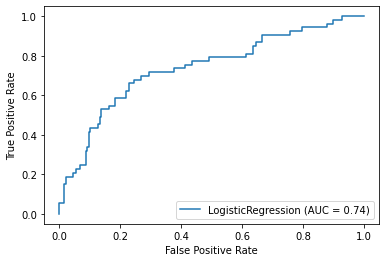

In [140]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(LR,x_test,y_test)

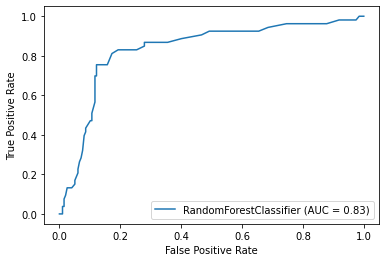

In [141]:
plot_roc_curve(RAN,x_test,y_test)

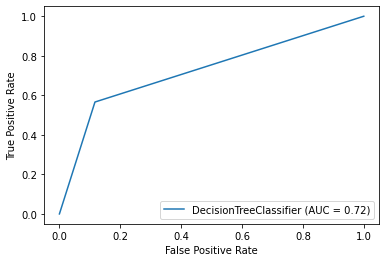

In [142]:
plot_roc_curve(dt,x_test,y_test)

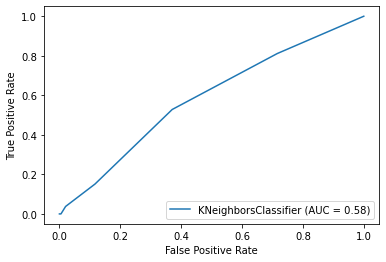

In [143]:
plot_roc_curve(KNN,x_test,y_test)

# Step No. 8 Saving Model

In [144]:
import joblib  #importing requried lib.
joblib.dump(mod,"InsuranceClaimFraudDetectionModel.pkl")

['InsuranceClaimFraudDetectionModel.pkl']